# This is a Sample File based on Export from Search Query

In [9]:
#import modules and dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from pprint import pprint
from config import gkey
from config import api_key
gmaps.configure(api_key= gkey)

#filters for dataframe from export.
table = pd.read_csv('data/export.csv')
#drop columns and duplicates for readability
master=table.drop(columns=['Unnamed: 0', 'Business ID']).drop_duplicates()

In [2]:
#sort the dataframe by number of reviews, Taking away duplicates
master2= master.sort_values(by='Reviews', ascending=False)

In [3]:
master2

,Business,City,State,Category,Latitude,Longitude,Price,Reviews,Rating
12,The Smoking Shop,New York,NY,Tobacco Shops,40.733877,-74.001795,2,55,4.5
9,Brooklyn Smoke Shop,Brooklyn,NY,Tobacco Shops,40.681565,-73.975946,2,32,4.5
30,Master Piece Smoke Shop,Brooklyn,NY,Tobacco Shops,40.732165,-73.955036,2,30,4.5
8,Smoke N Vape,Manhattan,NY,Tobacco Shops,40.760391,-73.990799,2,28,4.5
33,Mulberry Street Cigars,New York,NY,Tobacco Shops,40.718739,-73.997475,2,25,3.5
21,Master Piece Vape & Smoke Lounge,Bushwick,NY,Vape Shops,40.698315,-73.921127,2,24,4.0
25,Midtown Smoke and Vape,New York,NY,Vape Shops,40.754377,-73.995745,2,23,4.0
19,Barclay Rex,New York,NY,Tobacco Shops,40.704890,-74.008672,2,23,4.5
28,Vape & Smoke,Fresh Meadows,NY,Tobacco Shops,40.739861,-73.788834,2,23,4.5
7,Smoke Scene,New York,NY,Tobacco Shops,40.763712,-73.981138,2,16,4.5


# Change the Groupby to Category to Get Breakdown of Restaurants in Given Area

In [4]:
# master2.groupby('Category')
#count the different categories in the category count.
category_counts = master2['Category'].nunique()
#get the average of the reviews for sample of 50
average_reviews = master2['Reviews'].mean()
#get the average of the ratings for sample of 50
average_rating = master2['Rating'].mean()
#average price rating throughout sample
average_price = master2['Price'].mean()

#group by category
grouped_east_df = master2.groupby('Category')

#counts the total of each category within the column
total_category = grouped_east_df['Category'].count()
price_avg = grouped_east_df['Price'].mean()
review_counts = grouped_east_df['Reviews'].mean()
rating_counts = grouped_east_df['Rating'].mean()

#This will populate an array of all categories in Sample.
# east_category_unique = grouped["Category"].unique()
# east_category_unique #121 unique categories
# east_total_categories = len(east_category_unique)

#Populate a dataframe with specfics on Manhattan,NY Grouped by Category.
#This will populate the top 10 Categories when using .head(10)Can Be Changed for scope.
category_stats_df= pd.DataFrame({
    "Number of Restaurants": total_category,
    "Average Price of Category": price_avg.round(2),
    "Average # of Reviews per Restaurant": review_counts.astype(int),
    "Average Rating by Category": rating_counts.round(2)
}).sort_values(by='Number of Restaurants', ascending=False).head(10)

# Populate Dataframe Filtering by Greater Number of Restaurants in Sample

In [5]:
category_stats_df.head(10)

,Number of Restaurants,Average Price of Category,Average # of Reviews per Restaurant,Average Rating by Category
Category,,,,
Tobacco Shops,31,1.74,12,4.02
Vape Shops,18,0.72,6,4.25
Head Shops,1,1.00,16,4.00


In [6]:
#display of sorted dataframe.
master2
top_ten = pd.DataFrame(master.sort_values(by='Reviews', ascending=False).head(10))

# Create a Table of Top 10 Places in Sample

In [7]:
top_ten

,Business,City,State,Category,Latitude,Longitude,Price,Reviews,Rating
12,The Smoking Shop,New York,NY,Tobacco Shops,40.733877,-74.001795,2,55,4.5
9,Brooklyn Smoke Shop,Brooklyn,NY,Tobacco Shops,40.681565,-73.975946,2,32,4.5
30,Master Piece Smoke Shop,Brooklyn,NY,Tobacco Shops,40.732165,-73.955036,2,30,4.5
8,Smoke N Vape,Manhattan,NY,Tobacco Shops,40.760391,-73.990799,2,28,4.5
33,Mulberry Street Cigars,New York,NY,Tobacco Shops,40.718739,-73.997475,2,25,3.5
21,Master Piece Vape & Smoke Lounge,Bushwick,NY,Vape Shops,40.698315,-73.921127,2,24,4.0
25,Midtown Smoke and Vape,New York,NY,Vape Shops,40.754377,-73.995745,2,23,4.0
19,Barclay Rex,New York,NY,Tobacco Shops,40.704890,-74.008672,2,23,4.5
28,Vape & Smoke,Fresh Meadows,NY,Tobacco Shops,40.739861,-73.788834,2,23,4.5
7,Smoke Scene,New York,NY,Tobacco Shops,40.763712,-73.981138,2,16,4.5


# Create a Heatmap Based on Sample of 50 using # of Reviews as Weight

In [10]:
#create a heatmap of top ten places in sample
coordinates = master2[["Latitude", "Longitude"]]
# newyork_coordinates
weights = master2["Reviews"].astype(float)
# Heatmap 
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(coordinates, weights=weights,
                                   max_intensity=100,
                                   point_radius=10)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Create Different Dataframes/Pivot Tables Based on different Groupings with Categories.

In [9]:
#this will yeild broken down by state and price averages
# grouped = master2.groupby(['State'])

grouped = master2.groupby(['Rating'])

#this will break down by ratings in states.
# grouped = master2.groupby(['State', 'Rating'])

#this will breakdown by state, ratings and price and offer price by rating
# grouped = master2.groupby(['State', 'Price', 'Rating'])

#this changed to the grouping of the categories, Just redundant to the individual dataframes.
# grouped = master2.groupby(['State', 'Category', 'Price'])

# grouped = master2.groupby(['Category','Rating'])

#breakdown categories by top 10 popular
# grouped= master2.groupby(['Category'])
# df.sort_values(by='col1', ascending=False)

In [10]:
#TopTen Code.
# grouped_merged_df = merged_table_df.groupby(['Category'])
total_grouped_categories = grouped['Category'].count()
grouped_price_avg = grouped['Price'].mean()
grouped_reviews_count = grouped['Reviews'].mean()
total_grouped_review_counts = grouped['Reviews'].count()
average_grouped_ratings = grouped['Rating'].mean()
grouped_category_stats_df= pd.DataFrame({
    "Total Restaurants by Sample": total_grouped_categories,
    "Average Price By Category": grouped_price_avg.round(2),
    "Average # of Reviews per Restaurant": grouped_reviews_count.astype(int),
    "Average Ratings by Category": average_grouped_ratings.round(2)
})
grouped_category_stats_df

,Total Restaurants by Sample,Average Price By Category,Average # of Reviews per Restaurant,Average Ratings by Category
Rating,,,,
2.0,2,0.50,3,2.0
2.5,2,1.00,2,2.5
3.0,7,1.86,8,3.0
3.5,2,1.50,19,3.5
4.0,9,1.67,13,4.0
4.5,16,1.44,15,4.5
5.0,12,0.92,2,5.0


In [11]:
grouped2 = grouped_category_stats_df.reset_index()
grouped2

,Rating,Total Restaurants by Sample,Average Price By Category,Average # of Reviews per Restaurant,Average Ratings by Category
0,2.0,2,0.50,3,2.0
1,2.5,2,1.00,2,2.5
2,3.0,7,1.86,8,3.0
3,3.5,2,1.50,19,3.5
4,4.0,9,1.67,13,4.0
5,4.5,16,1.44,15,4.5
6,5.0,12,0.92,2,5.0


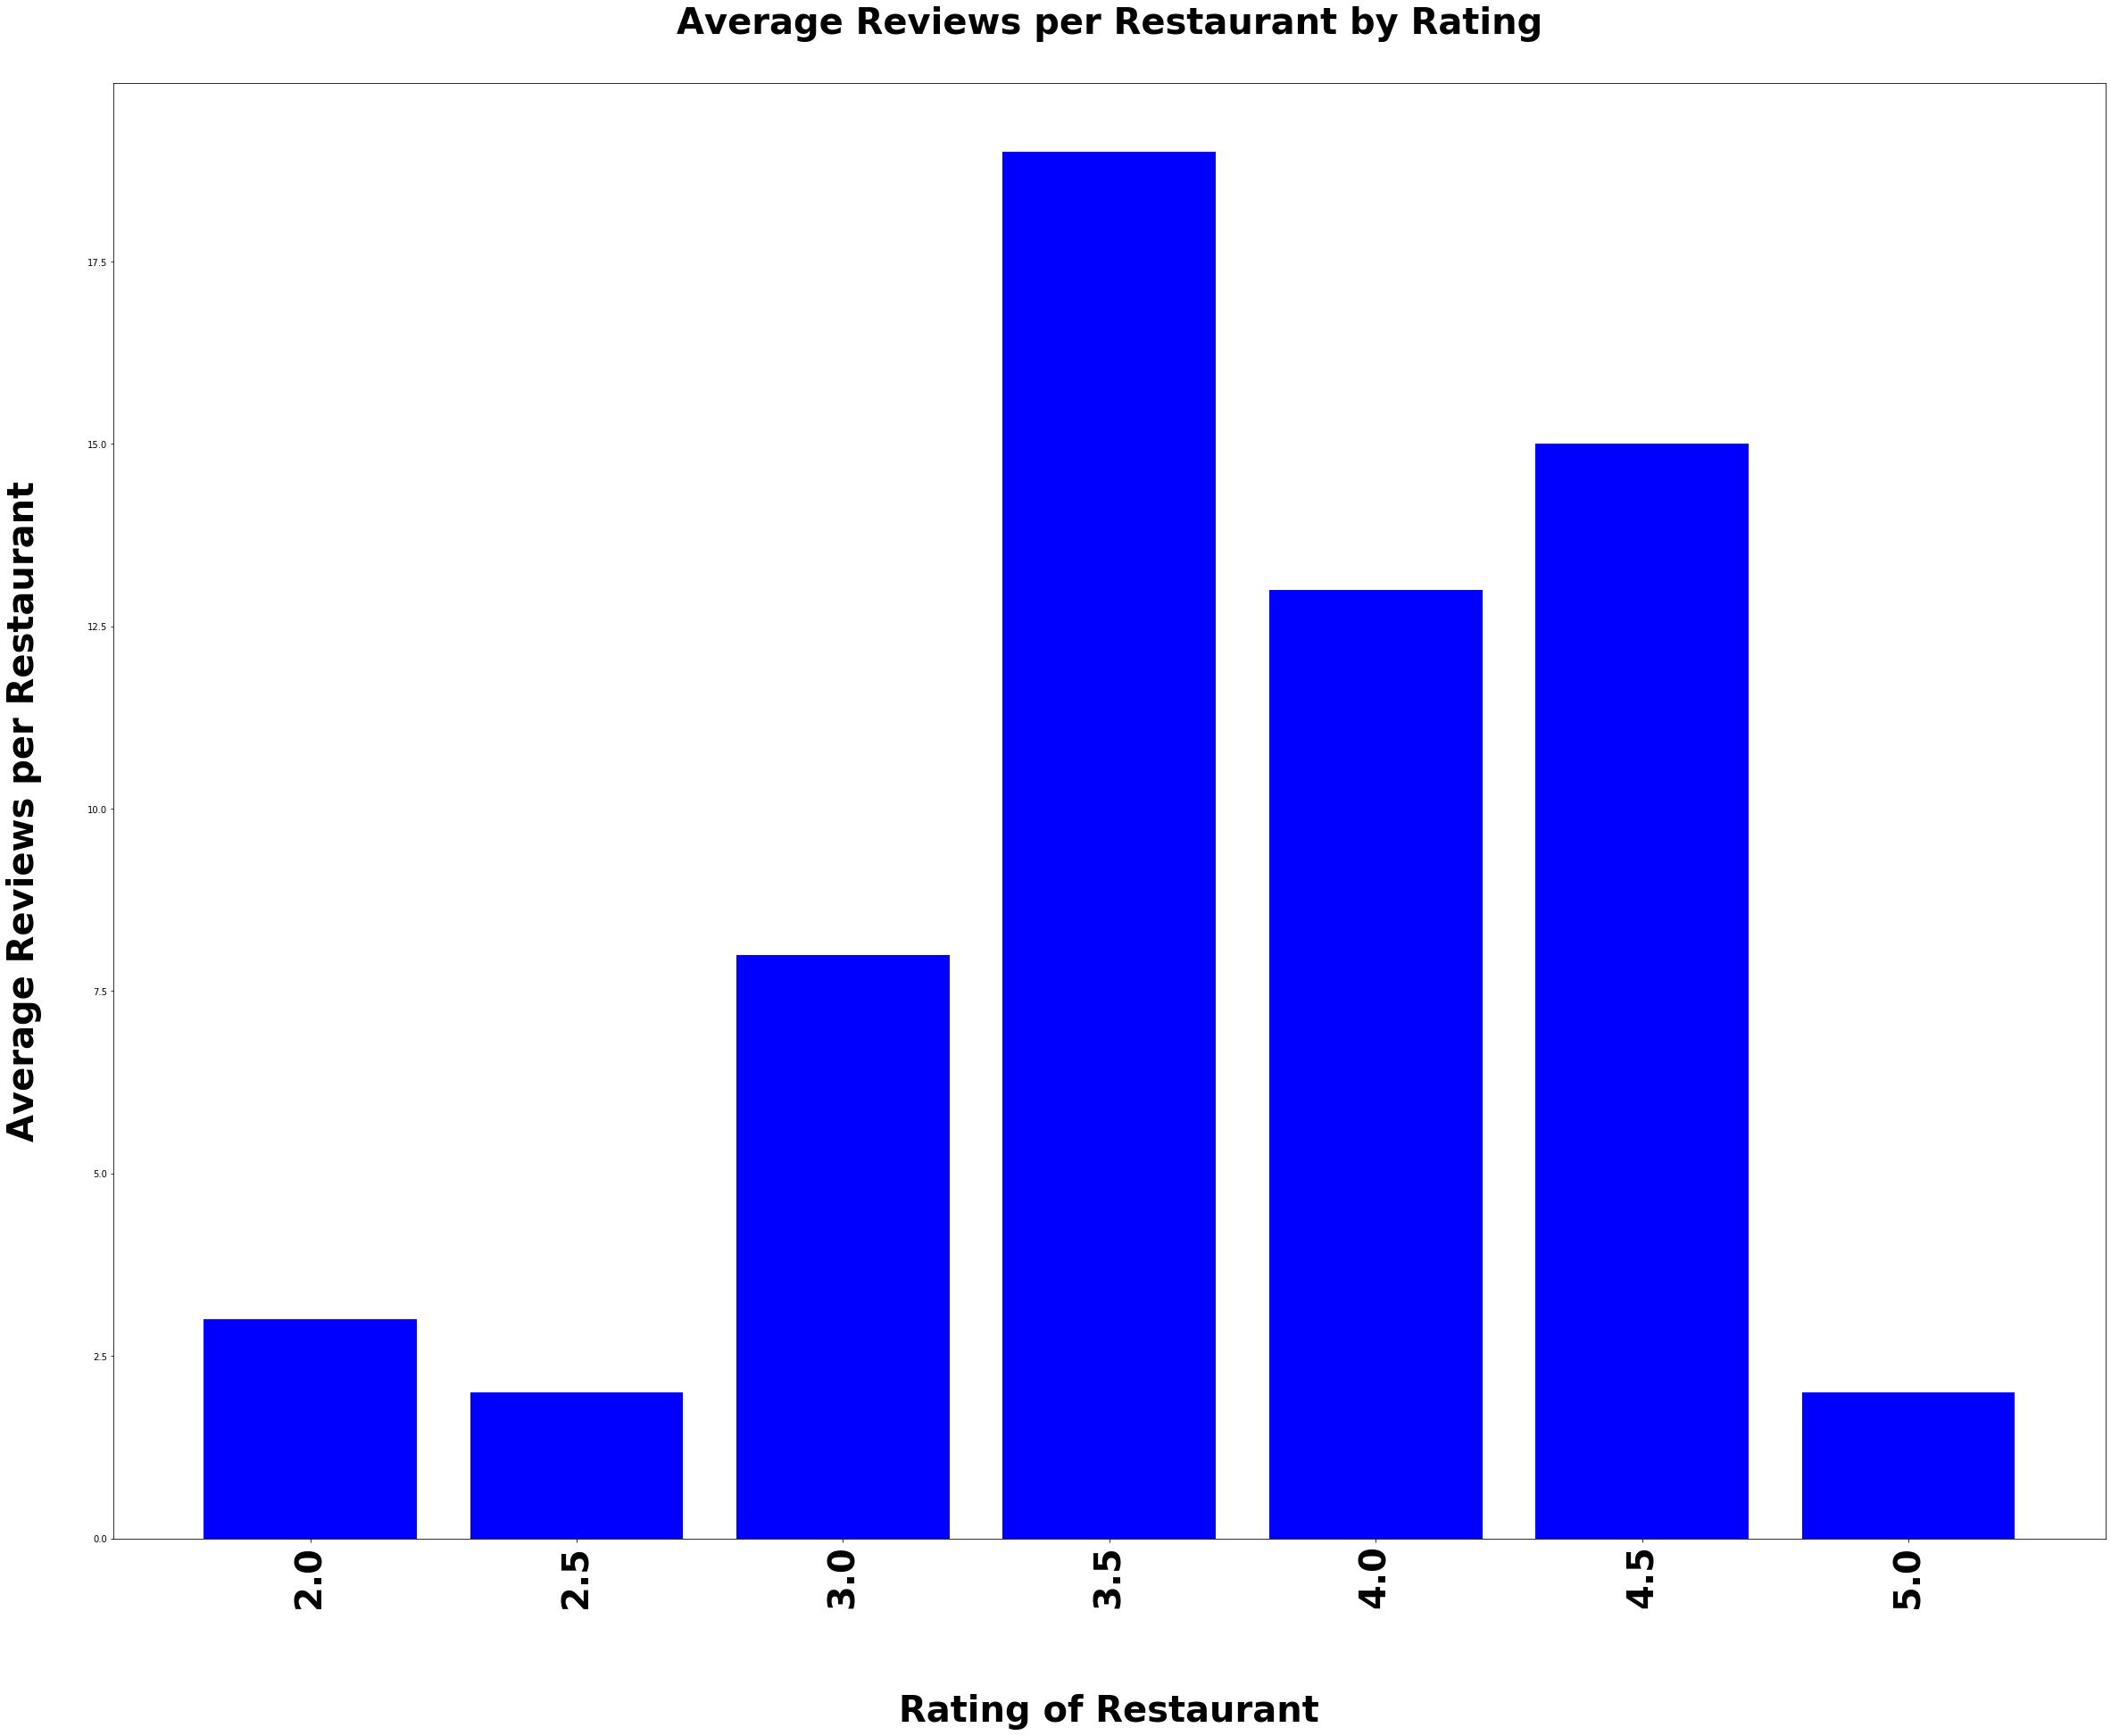

In [12]:
north_topten_unique = grouped2["Rating"].unique()
north_bar_topten = grouped2["Average # of Reviews per Restaurant"]
x_axis = north_topten_unique
#bar graph

plt.figure(figsize=(40,30))

ax = plt.bar(x_axis, north_bar_topten, color='blue', alpha=1, align='center', width=.4)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, north_topten_unique, rotation=90, weight="bold", fontsize=40);

plt.title("Average Reviews per Restaurant by Rating\n", fontsize=40, weight="bold");
plt.ylabel("Average Reviews per Restaurant\n", weight="bold", fontsize=40);
plt.xlabel("\n\nRating of Restaurant", weight="bold", fontsize=40);

# plt.savefig("plots/Top_Ten_North_BarGraph_Average_Reviews_By_Categories.png")